In [16]:
from data import *
from models import *
from utils import *

%load_ext autoreload
%autoreload 2

import torch
import torch.optim as torch_optimizer # by naming it optimizer, it will conflict with the optimizer instantiated class
from torchinfo import summary

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Data & DataLoader

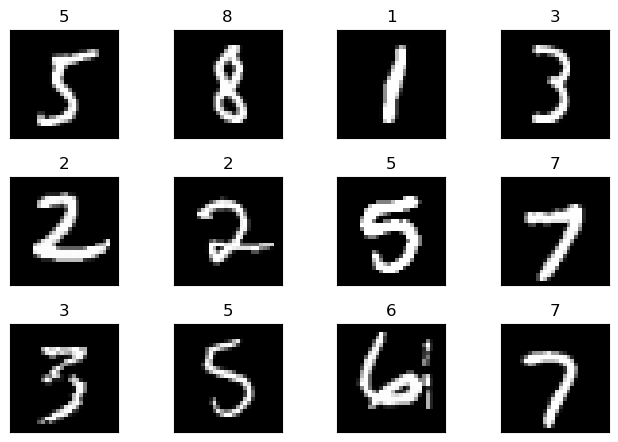

In [17]:
train_dataset, test_dataset
train_dataloader, test_dataloader

import matplotlib.pyplot as plt
batch_data, batch_label = next(iter(train_dataloader)) 

fig = plt.figure()
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

## 2. Model & Model Parameters

In [18]:
model = FirstDNN()
summary(model,input_size=(1,28,28),verbose=2);

Layer (type:depth-idx)                   Output Shape              Param #
FirstDNN                                 [1, 10]                   --
├─Conv2d: 1-1                            [32, 28, 28]              320
│    └─weight                                                      ├─288
│    └─bias                                                        └─32
├─Conv2d: 1-2                            [64, 28, 28]              18,496
│    └─weight                                                      ├─18,432
│    └─bias                                                        └─64
├─MaxPool2d: 1-3                         [64, 14, 14]              --
├─Conv2d: 1-4                            [128, 14, 14]             73,856
│    └─weight                                                      ├─73,728
│    └─bias                                                        └─128
├─Conv2d: 1-5                            [256, 14, 14]             295,168
│    └─weight                                    

## 3. Model Training

In [19]:

model = FirstDNN()
errorFun = torch.nn.functional.nll_loss
optimizer = torch_optimizer.SGD(model.parameters(), lr=0.01, momentum=0.9)
device =torch.device("mps")

In [20]:
for epoch in range(1, 2):
	train(train_dataloader, model, errorFun, optimizer,epoch)
	test(test_dataloader, model, errorFun)

TRAIN: Batch= 167, Batch Error = 1.436340, Batch Accuracy = 43.750000:   9%|▉         | 168/1875 [00:52<08:39,  3.29it/s]

## 4. Learning Curves

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(training_losses_epochwise)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(training_accuracy_epochwise)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_epochwise)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_accuracy_epochwise)
axs[1, 1].set_title("Test Accuracy")